# Final Project

You have made it to the end of the course.
In the labs, you saw a couple simplified examples of constructing data stories.

For the final project, you will 
 1. find some data, 
 2. upload it to JupyterHub
 3. construct a data story

---

## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

League of Legends is a multiplayer online battle arena, there have two teams (blue and red) including 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game. This dataset contains the first 10min. stats of approx. 10k ranked games (SOLO QUEUE) from a high ELO (DIAMOND I to MASTER). Players have roughly the same level.Each game is unique. The gameId can help you to fetch more attributes from the Riot API. There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, leve and others. 
The column blueWins is the target value (the value we are trying to predict). A value of 1 means the blue team has won 0 otherwise.






## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

The League of Legends's professional player will be the audience, they can through my analysis to do kind of predict in the first 10 minutes of blue and red teams which data influence their victory or defeat, and what significant factors will cause the team win in the first 10 minutes. and we use dateset is from the high level players in this game so that they have more representativeness.





## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name of the file that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, and perform some exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
# drop the gameId column which contribute nothing to the analysis
df.drop('gameId', axis=1, inplace=True)

In [4]:
# check the whole dataset and see if there is null value inside.
df.isnull().sum() > 0

blueWins                        False
blueWardsPlaced                 False
blueWardsDestroyed              False
blueFirstBlood                  False
blueKills                       False
blueDeaths                      False
blueAssists                     False
blueEliteMonsters               False
blueDragons                     False
blueHeralds                     False
blueTowersDestroyed             False
blueTotalGold                   False
blueAvgLevel                    False
blueTotalExperience             False
blueTotalMinionsKilled          False
blueTotalJungleMinionsKilled    False
blueGoldDiff                    False
blueExperienceDiff              False
blueCSPerMin                    False
blueGoldPerMin                  False
redWardsPlaced                  False
redWardsDestroyed               False
redFirstBlood                   False
redKills                        False
redDeaths                       False
redAssists                      False
redEliteMons

Text(0, 0.5, '')

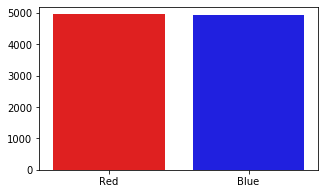

In [5]:
# check if the dataset is balanced, which has blue and red wins amoung almost equal
plt.figure(figsize=(5,3))
sns.countplot(x=df.blueWins, palette=sns.color_palette(['r','b']))
plt.xticks([0,1], ['Red', 'Blue'])
plt.xlabel('')
plt.ylabel('')
#we can see from the result the amount of blue team win and red team win is relative the same

In [6]:
# in this lab. I want to do two things. 
# First, check what are the features which can influnce the win/loss of the match. 
#           For example, does First Blood promise the win of this team? If not, what's the most important feature we need to focus
# Second, since this dataset is based on the First 10 mins game play. So I wonder if those 10 mins data could predict the winning of the team or not.
#           Then, based on the features from the first questions, I want to check if I drop some unlated columns, what could the accuracy be.
# 
# So in the following section, I will seperate into two parts of dealing with the dataset and visuilize them. (Mark as Q1 and Q2)

## Step 5: Filter Results

Perform you data carpentry that helps in your story telling here.

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

<Figure size 1080x1080 with 0 Axes>

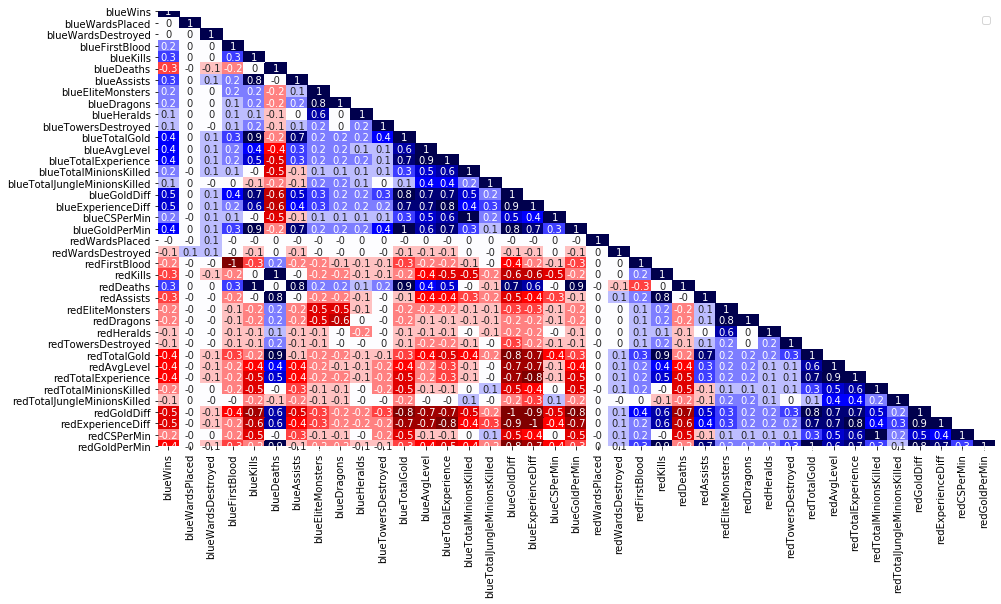

In [7]:
# Q1
# Check the correlation matrix of all the variables, and draw a heat map to 
# check how features are correlated to each other and what are most influencers to blueWins column.
plt.figure(figsize=(15,15))
corrmat = df.corr()
corrmat = np.tril(corrmat)
corrmat[corrmat==0] = None
corrmat = corrmat.round(1)
labels = df.select_dtypes(include='number').columns.values
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrmat, annot=True, vmax=0.8,vmin=-0.8, cmap='seismic_r', xticklabels=labels,yticklabels=labels, cbar=False)
plt.legend('')

plt.show()

# from the correlation matrix we can find some interesting features
# For example, placing wards or not may not influence to much about the win/lose of the game. This is not very common in
# my game playing. Since I'm not so skilled in playing League, I think placing ward is important which we can clearly see
# the enemy location which could influence the match status. Maybe the dataset is from some high-level matches, both of the
# team can control the vision of the map! LoL

In [8]:
# Q2
# split the dataset, define our target variable as y and others as X
from sklearn.model_selection import train_test_split
y = df['blueWins']
X = df.drop('blueWins', axis=1)
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1) 

## Step 6: Visuals 

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [11]:
# Drop some unecessary columns. e.g. blueFirstblood/redfirst blood blueEliteMonster/redEliteMonster blueDeath/redKills etc are repeated
# Based on personal experience with the game, mimion yield gold+experience, we can drop minion kill too
cols = ['redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']
df_clean = df.drop(cols, axis = 1)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


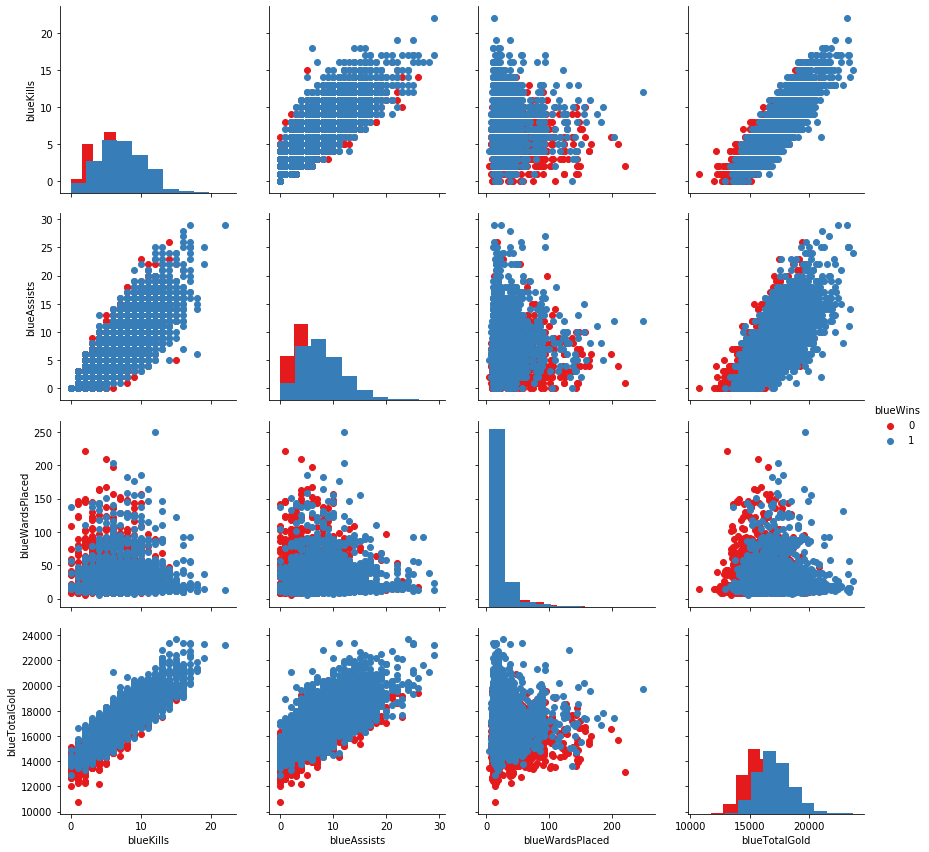

In [13]:
# Q1 
# Next let's check the relationship between parameters of blue team features
g = sns.PairGrid(data=df_clean, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', size=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [15]:
# Based on the correlation matrix, let's clean the dataset a little bit more to avoid colinearity, 
# only select blue team related columns
cols = ['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience']

df_clean = df_clean[cols]
df_clean.head()


,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,1,9,6,11,0,0,17210,17039
1,0,5,5,5,0,0,14712,16265
2,0,7,11,4,1,1,16113,16221
3,0,4,5,5,1,0,15157,17954
4,0,6,6,6,0,0,16400,18543


In [16]:
# Q2 
# In this part, I will try different classification algorithm on sklearn to achieve as mush accuracy as possible.
# First, I will define a function to train any model and return its accuracy:
def test_classifier(model, X_train, X_test, y_train, y_test):      
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return f'{round(accuracy,4)*100}%'

The accuracy of the model is: 64.21%


Text(0.5, 1, 'Confusion matrix')

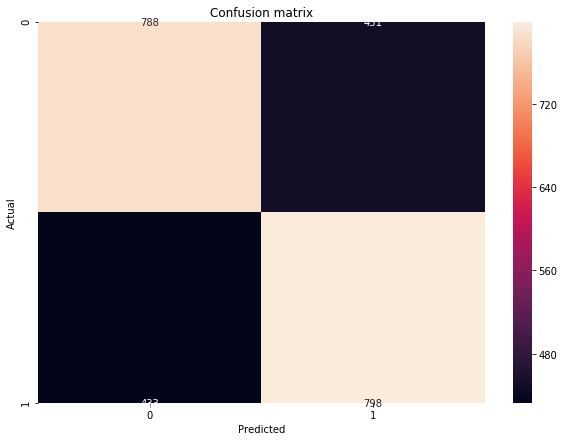

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
tree_model = DecisionTreeClassifier(random_state=1)

first_run = test_classifier(tree_model, X_train, X_test, y_train, y_test)
print(f'The accuracy of the model is: {first_run}')
tree_model.fit(X_train, y_train)
predictions = tree_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
plt.ylabel('actual')
plt.xlabel('predicted')
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
ax.set_title('Confusion matrix')
# the accuracy is 64%, which is not so ideal.

In [23]:
# So, this time, I will only select highly related columns to check the accuracy. This time I use Naive Bayes rather than decision tree classifier
# train test split scale the set
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
X = df_clean
y = df['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

pred_nb = clf_nb.predict(X_test)

# get the accuracy score
acc_nb = accuracy_score(pred_nb, y_test)
print(acc_nb)

# as we can see from the result, we can get 71% of accuracy compared with 64%

0.7176113360323887


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Conclusion: Tell the Story
In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel. 

Feel free to post more examples for people to look at and give feedback about. Your classmates will be vital providers of feedback in this process. Utilize them.

Based on the correlation matrix, histogram,and heat map, we find there have eight features are more related with blue teams which are blueFirstBlood, blueKills,'blueDeaths','blueAssists','blueEliteMonsters','blueDragons','blueTotalGold' and 'blueTotalExperience'. then I predict through the first 10 mintues, I use all data to be input, bluewins to be output, but I find the accuracy is 64%, which is not so ideal. so that I decided only select highly related columns to check the accuracy(x value is these highly related columns, Y value is bluewins). This time I use Naive Bayes rather than decision tree classifier train test split scale the set, the result accuracy is 71%. Therefore these useful data can kind of predict blue team wins.    











# Save your notebook, then `File > Close and Halt`